 # Google Ads Search Queries Clustering

I really wanna know what you guys think about that project. I'm open to all improvements, rewording or criticism. Please don't hesitate to leave me a comment or upvote. 
I will appreciate it.

## Table of Contents <a name="top"></a>

* [1 - Introduction](#introduction)
* [2 - Data](#data)
* [3 - Methodology](#methodology)
* [4 - Data Check](#Dc)
    * [4.1 - Data Cleaning](#DC)
    * [4.2 - Data Preprocessing](#Dp)
    * [4.3 - Distribution](#dist)
* [5 - Kmeans](#KM)
    * [5.1 - Silhouette Score - Kmeans](#ssKM)
    * [5.2 - Clusters Label - Kmeans](#alcKM)
    * [5.3 - Tabular Overview - Kmeans](#toKM)
    * [5.4 - Size - Bar Plot - Kmeans](#sbpKM)
    * [5.5 - Mean of the Features - Polar Plot - Kmeans](#mfppKM)
    * [5.6 - 5 Features Representation - 3D Plot - Kmeans](#5frKM)
    * [5.7 - Principal Component Analysis (PCA) - Scatter Plot - Kmeans](#pcaspKM)
    * [5.8 - Summary Description - Kmeans](#sdKM)
* [6 - Spectral Clustering](#SC)
    * [6.1 - Silhouette Score - Spectral Clustering](#ssSC)
    * [6.2 - Clusters Label - Spectral Clustering](#alcSC)
    * [6.3 - Tabular Overview - Spectral Clustering](#toSC)
    * [6.4 - Size - Bar Plot - Spectral Clustering](#sbpSC)
    * [6.5 - Mean of the Features - Polar Plot - Spectral Clustering](#mfppSC)
    * [6.6 - 5 Features Representation - 3D Plot - Spectral Clustering](#5frSC)
    * [6.7 - Principal Component Analysis (PCA) - Scatter Plot - Spectral Clustering](#pcaspSC)
    * [6.8 - Summary Description - Spectral Clustering](#sdSC)
* [7 - Agglomerative Clustering](#AC)
    * [7.1 - Silhouette Score - Agglomerative Clustering](#ssAC)
    * [7.2 - Clusters Label - Agglomerative Clustering](#alcAC)
    * [7.3 - Tabular Overview - Agglomerative Clustering](#toAC)
    * [7.4 - Size - Bar Plot - Agglomerative Clustering](#sbpAC)
    * [7.5 - Mean of the Features - Polar Plot - Agglomerative Clustering](#mfppAC)
    * [7.6 - 5 Features Representation - 3D Plot - Agglomerative Clustering](#5frAC)
    * [7.7 - Principal Component Analysis (PCA) - Scatter Plot - Agglomerative Clustering](#pcaspAC)
    * [7.8 - Summary Description - Agglomerative Clustering](#sdAC)
* [8 - Gaussian Mixture](#GM)
    * [8.1 - Silhouette Score - Gaussian Mixture](#ssGM)
    * [8.2 - Clusters Label - Gaussian Mixture](#alcGM)
    * [8.3 - Tabular Overview - Gaussian Mixture](#toGM)
    * [8.4 - Size - Bar Plot - Gaussian Mixture](#sbpGM)
    * [8.5 - Mean of the Features - Polar Plot - Gaussian Mixture](#mfppGM)
    * [8.6 - 5 Features Representation - 3D Plot - Gaussian Mixture](#5frGM)
    * [8.7 - Principal Component Analysis (PCA) - Scatter Plot - Gaussian Mixture](#pcaspGM)
    * [8.8 - Summary Description - Gaussian Mixture](#sdGM)
* [9 - The Best Choice](#TBC)
* [10 - Conclusion](#CON)



<a id="introduction"></a>
# 1 - Introduction

The main objective of the project is to find the best clustering models for Pay Per Click Search Query extracted from Google Analytics.

Once each Query  click costs money, clustering and labeling the search queries with information about user behavior and ecommerce metrics can give us valuable insights that could reduce the cost of the campaign, allocating the budget better to improve the results. 

More than have a good score, here we are going to look for meaningful cluster labels.

I really wanna thank [Mr. Mauricio Letelier](https://www.linkedin.com/in/maletelier/), the writer of [this amazing post on Medium](https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a) that helped me alot to accomplish this project. 



Have fun :)



<a id="data"></a>
# 2 - Data

The data was exported from Google Analytics, in a very hidden  option in Acquisition > Google Ads > Search Queries After that look for -> Site Usage (Secret Button) in the top left of the user graph of the period.
<br>
<br>

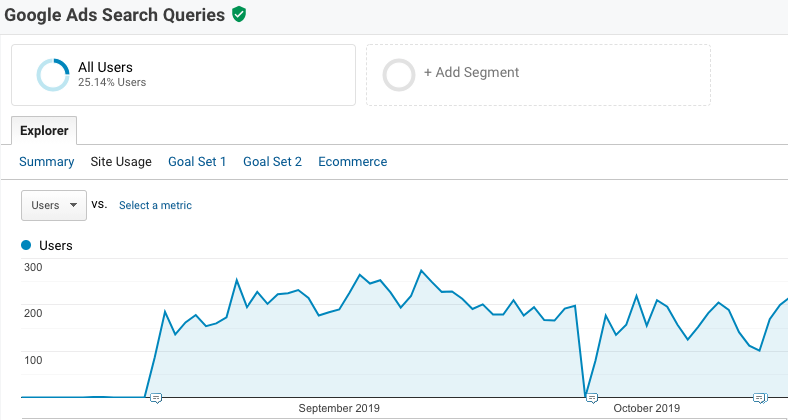

<br>
<br>


Now we have information about the Search Queries that bring users to the site and metrics related with behavior and ecommerce. The features are: 


* **Search Query** - The actual search query that triggered users to the site. However, here due to the privacity of the website, we modify it for random letter sequence.
* **Users** - Users who have initiated at least one session during the date range. Learn more about how Analytics calculates the number of users.
* **Sessions** - Total number of Sessions within the date range. A session is the period time a user is actively engaged with your website, app, etc. All usage data (Screen Views, Events, Ecommerce, etc.) is associated with a session.
* **Pages / Session** - Pages/Session (Average Page Depth) is the average number of pages viewed during a session. Repeated views of a single page are counted.
* **Avg. Session** - The average length of a Session.
* **% New Session** - An estimate of the percentage of first time visits.
* **Goal Completions** - The total number of conversions.
* **Revenue** - The total revenue from web ecommerce or in-app transactions. Depending on your implementation, this can include tax and shipping.

The shape of the data is 5000 rows and 8 columns.


<a id="methodology"></a>
# 3 - Methodology

To find the best cluster model for our data set, first we will clean the data, drop the most correlated features and we will scale the data frame. For each of the four clustering models that we will test, we will be looking for the best silhouette score testing the optimal number of clusters in a range of 3 numbers. 
We are going to create DF with the total and mean of the clustering labels. We are going to plot the result in a few ways.
After that we are going to look for some patterns created by the algorithms and analyse the mean and totals to choose our best cluster model

* For manipulation and analyse the data we are going to use the **Pandas** libraries.
* We will use **Plotly** library and the modules **Express**, **make_subplots**, **graph_objects** to the visualization
* For transform to **normalization** we will use **numpy log** and after that we will use **sklearn** **preprocessing** package to **scale** the data.
* For choose the optimal number of clusters for our models we are going to look for the best **silhouette_score** from **sklearn.metrics** in a range of 3 numbers [2,3,4]. For an easy comprehension we will prefer a small number of clusters. 
* For visualization the result, we will use the **line_polar**, **scatter_3d** to visualize the 5 features in just one plot. The  **go.Bar** to visualize the amount of each label and use the **Principal component analysis (PCA)** from **sklearn.decomposition** module to visualize the labels in a two dimensional scatter plot.
* To have a good understanding about the labels we will use basic **descriptive statistics**. easily that we can easily get with the *.describe()** method. 
* The cluster models that we will test in this project will be **KMeans**, **Spectral Clustering**, **Agglomerative Clustering** and **Gaussian Mixture**.


Let's get started!


<a id="Dc"></a>
# 4 - Data Check

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../input/searchqueries/searchquery_.csv',index_col=0)

In [3]:
df

,Users,Sessions,Pages / Session,Avg. Session Duration,% New Sessions,Bounce Rate,Goal Completions,Revenue
Search Query,,,,,,,,
Mmjzq Isna,"1,235","3,175",14.83,00:09:36,26.83%,21.98%,"4,260","R$9,357.95"
Rzacvcjuh,404,"1,017",12.64,00:08:11,31.66%,24.09%,"1,249","R$2,329.55"
Tcqsrkbkf Sxyrcq Zv Ss Jrqei,3,3,27.67,00:20:56,66.67%,0.00%,7,"R$1,698.59"
Spcu Os Uttzzhzwa Yroadv R Qmrruamrt,"1,162","1,454",9.32,00:05:13,73.52%,38.58%,"1,209","R$1,175.96"
Yjad Pyubo Isjx,309,641,11.45,00:06:25,38.07%,29.02%,747,R$866.82
...,...,...,...,...,...,...,...,...
Xkc Ogju Xgavyfd Pykgglkwr Ihwpez,1,1,8.00,00:03:03,100.00%,0.00%,2,R$0.00
Qpom Ig Uojkr On Btck Tcd Pntkty Eqeilldfeq Tazkndy,1,1,1.00,00:00:00,100.00%,100.00%,0,R$0.00
Xsfz Ekjqe Zfzc,1,2,3.50,00:03:35,50.00%,50.00%,2,R$0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, Mmjzq Isna to Daxg Vafw Hkiwby Nyatcacwj Cseev
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Users                  5000 non-null   object 
 1   Sessions               5000 non-null   object 
 2   Pages / Session        5000 non-null   float64
 3   Avg. Session Duration  5000 non-null   object 
 4   % New Sessions         5000 non-null   object 
 5   Bounce Rate            5000 non-null   object 
 6   Goal Completions       5000 non-null   object 
 7   Revenue                5000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 351.6+ KB


<a id="DC"></a>
## 4.1 - Data Cleaning

As shown above, the data imported from Google Analytics are complete and no columns have null values. However the majority of the Dtypes are objects. So, now let's set it as float or int.

In [5]:
df['Users'] = df['Users'].replace( ',','', regex=True ).astype('int')
df['Sessions'] = df['Sessions'].replace( ',','', regex=True ).astype('int')
df['Avg. Session Duration'] = pd.to_timedelta(df['Avg. Session Duration'].replace('<','', regex=True )).astype(int) / 1e9//60
df['% New Sessions'] = df['% New Sessions'].str.rstrip('%').astype('float') / 100.0
df['Bounce Rate'] = df['Bounce Rate'].str.rstrip('%').astype('float') / 100.0
df['Goal Completions'] = df['Goal Completions'].replace( ',','', regex=True ).astype('int')
df['Revenue'] = df['Revenue'].replace( '[R$,]','', regex=True ).astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, Mmjzq Isna to Daxg Vafw Hkiwby Nyatcacwj Cseev
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Users                  5000 non-null   int64  
 1   Sessions               5000 non-null   int64  
 2   Pages / Session        5000 non-null   float64
 3   Avg. Session Duration  5000 non-null   float64
 4   % New Sessions         5000 non-null   float64
 5   Bounce Rate            5000 non-null   float64
 6   Goal Completions       5000 non-null   int64  
 7   Revenue                5000 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 351.6+ KB


In [7]:
df.columns

Index(['Users', 'Sessions', 'Pages / Session', 'Avg. Session Duration',
       '% New Sessions', 'Bounce Rate', 'Goal Completions', 'Revenue'],
      dtype='object')

In [8]:
# dropping 'sessions' less than 1

df = df[df['Sessions']>=1]

df.shape

(4999, 8)

In [9]:
# dropping 'nan' 

df = df.dropna()

<a id="Dp"></a>
## 4.2 - Data Preprocessing  

Before applying the ML cluster models in our data set, we need to choose the best features and preprocess the data.

For dropping, we are going to analyse the correlation of the features. High correlation represents the same characteristic of a segment. It is not useful for ML algorithms. To do the correlation analyse, we will use the .corr() method to find the pairwise correlation of all columns in the dataframe. After that we will plot a scatter matrix about all features:


In [10]:
df.corr()

,Users,Sessions,Pages / Session,Avg. Session Duration,% New Sessions,Bounce Rate,Goal Completions,Revenue
Users,1.000000,0.935921,0.032623,0.028991,-0.042477,-0.026795,0.812138,0.622891
Sessions,0.935921,1.000000,0.037796,0.035110,-0.060996,-0.028128,0.962907,0.841330
Pages / Session,0.032623,0.037796,1.000000,0.760613,-0.181253,-0.397201,0.053468,0.052765
Avg. Session Duration,0.028991,0.035110,0.760613,1.000000,-0.145683,-0.357541,0.050478,0.054612
% New Sessions,-0.042477,-0.060996,-0.181253,-0.145683,1.000000,0.094906,-0.067027,-0.065092
Bounce Rate,-0.026795,-0.028128,-0.397201,-0.357541,0.094906,1.000000,-0.037382,-0.029841
Goal Completions,0.812138,0.962907,0.053468,0.050478,-0.067027,-0.037382,1.000000,0.932182
Revenue,0.622891,0.841330,0.052765,0.054612,-0.065092,-0.029841,0.932182,1.000000


In [11]:
import plotly.express as px

In [12]:
fig = px.scatter_matrix(df,width=1000, height=1000)
fig.show()

The correlation matrix and the plot help us to choose the features to be dropped.

* **'Users'** - Is very strong correlated with 'Sessions' the pearson value is 0.935921
* **'Pages / Session'** - Is moderated correlated with 'Avg. Session Duration'. The pearson value is 0.760620
* **'Goal Completions'** - Is very strongly correlated with Sessions. The pearson value is 0.997876.

After a few tests we see that even the **'% New Session'** don't having a strong correlation with any other feature, the clusters are better defined without that feature. For that reason we will drop that feature as well.



In [13]:
# Droping and organizing the columns

cols = ['Sessions',
      'Avg. Session Duration',
      'Bounce Rate',
      'Revenue']
    

df = df[cols]

In [14]:
fig = px.scatter_matrix(df,width = 600, height = 600)

fig.show()

In [15]:
# Resetting the index and defining X as the DF without the Search Queries

df = df.reset_index()

X = df[df.columns[1:]]

In [16]:
df.head()

,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue
0,Mmjzq Isna,3175,9.0,0.2198,9357.95
1,Rzacvcjuh,1017,8.0,0.2409,2329.55
2,Tcqsrkbkf Sxyrcq Zv Ss Jrqei,3,20.0,0.0000,1698.59
3,Spcu Os Uttzzhzwa Yroadv R Qmrruamrt,1454,5.0,0.3858,1175.96
4,Yjad Pyubo Isjx,641,6.0,0.2902,866.82


In [17]:
X.head()

,Sessions,Avg. Session Duration,Bounce Rate,Revenue
0,3175,9.0,0.2198,9357.95
1,1017,8.0,0.2409,2329.55
2,3,20.0,0.0000,1698.59
3,1454,5.0,0.3858,1175.96
4,641,6.0,0.2902,866.82


<a id="dist"></a>
## 4.3 -  Distribution

Before applying the cluster models we will check the data distribution. To do that, we will use the Box plot for all the features.

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [19]:
fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Box(y = X['Sessions'],name='Sessions'),row=1,col=1)
fig.add_trace(go.Box(y = X['Avg. Session Duration'],name ='Avg. Session Duration'),row=1,col=2)
fig.add_trace(go.Box(y = X['Bounce Rate'],name ='Bounce Rate'),row=1,col=3)
fig.add_trace(go.Box(y = X['Revenue'],name  ='Revenue'),row=1,col=4)

fig.show()

To make it easy for the algorithme identify the clusters and minimize the effect of outliers and noise in the data, we should transform to normal distribution. For that we will use numpy log and after that we will use sklearn preprocessing package to scale the data. 

In [20]:
import numpy as np
from numpy import inf

In [21]:
X = np.log(X)
X[X == -inf] = 0
X

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



,Sessions,Avg. Session Duration,Bounce Rate,Revenue
0,8.063063,2.197225,-1.515037,9.143982
1,6.924612,2.079442,-1.423373,7.753430
2,1.098612,2.995732,0.000000,7.437554
3,7.282074,1.609438,-0.952436,7.069840
4,6.463029,1.791759,-1.237185,6.764831
...,...,...,...,...
4994,0.000000,1.098612,0.000000,0.000000
4995,0.000000,0.000000,0.000000,0.000000
4996,0.693147,1.098612,-0.693147,0.000000
4997,0.000000,0.000000,0.000000,0.000000


In [22]:
from sklearn import preprocessing

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled,columns=cols)

In [24]:
fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Box(y = X['Sessions'],name='Sessions'),row=1,col=1)
fig.add_trace(go.Box(y = X['Avg. Session Duration'],name='Avg. Session Duration'),row=1,col=2)
fig.add_trace(go.Box(y = X['Bounce Rate'],name='Bounce Rate'),row=1,col=3)
fig.add_trace(go.Box(y = X['Revenue'],name='Revenue'),row=1,col=4)

fig.show()

# 5 - Kmeans <a id="KM"></a>

KMeans is the most popular cluster algorithm. It tries to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. 
 

The best explanation that I read about the Kmean algorithm was in [documentation](https://scikit-learn.org/stable/modules/clustering.html#k-means):

   "*In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose  samples from the dataset . After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly*"


In [25]:
from sklearn.cluster import KMeans

## 5.1 - Silhouette Score - Kmeans <a id="ssKM"></a>

The Kmean, as the other 3 algoritmos  that we are going to use in this notebook, requires the number of clusters to be specified. The optimal number of clusters is somehow subjective and depends on the method. 

For that project I choose to use the Silhouette Score method.

The [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) explain the Silhouette Score as calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

For every algorithm used, we run a for loop in a range of 3 (to facilitate the comprehension of the clusters) numbers, and choose the number of clusters for the best silhouette score.


In [26]:
from sklearn.metrics import silhouette_score

In [27]:
range_n_clusters = [2, 3, 4]
    
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters = n_clusters,
                        random_state = 42)
    preds = clusterer.fit_predict(X)

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6524417370680637)
For n_clusters = 3, silhouette score is 0.6843065145447066)
For n_clusters = 4, silhouette score is 0.705791978442904)


The best silhouette score was 0.71 for 4 n_clusters.

## 5.2 - Clusters Label - Kmeans <a id="alcKM"></a>

Implementing K-Means clustering with the Optimal number of clusters equal 4. 

In [28]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

We will label 2 data frames.
The original data and the normalized data.


In [29]:
# Labeling X (The data nomalized)

clusters_kmeans = pd.DataFrame(X,columns=cols)
clusters_kmeans['label'] = kmeans.predict(X)
clusters_kmeans = clusters_kmeans.join(df['Search Query'])

In [30]:
# Labeling df (The original data)

df_kmeans = df.join(clusters_kmeans['label'])

## 5.3 - Tabular Overview - Kmeans<a id="toKM"></a>

The next function will return two data frames that will help us to understand the differences between the labels.
 * The first data frame will contain the total of sessions and revenue of the Search Queries per label and the size of each label. 

 * The second data frame will return the mean of the features per labels, so then we will have a good understanding of the differences.
 



In [31]:
def overview(df):
    
    zero = df[df['label']==0]
    one = df[df['label']==1]
    two = df[df['label']==2]
    three = df[df['label']==3]


    index = ['zero_label',
               'one_label',
               'two_label',
               'three_label']


    total_df = pd.DataFrame({ 'Total Sessions':[zero['Sessions'].sum(),
                                                one['Sessions'].sum(),
                                                two['Sessions'].sum(),
                                                three['Sessions'].sum()
                                   ],
                                  'Total Revenue':[zero['Revenue'].sum(),
                                                   one['Revenue'].sum(),
                                                   two['Revenue'].sum(),
                                                   three['Revenue'].sum()
                                                  ],
                                'Size':[zero['Revenue'].shape[0],
                                                 one['Revenue'].shape[0],
                                                 two['Revenue'].shape[0],
                                                 three['Revenue'].shape[0]]
                            },index = index)


    mean_df = pd.DataFrame({'Sessions Mean':[zero['Sessions'].mean(),
                                            one['Sessions'].mean(),
                                            two['Sessions'].mean(),
                                            three['Sessions'].mean()
                                  ],
                            'Avg. Session Duration Mean':[zero['Avg. Session Duration'].mean(),
                                                         one['Avg. Session Duration'].mean(),
                                                         two['Avg. Session Duration'].mean(),
                                                         three['Avg. Session Duration'].mean()
                                                           ],

                            'Bounce Rate Mean':[zero['Bounce Rate'].mean(),
                                               one['Bounce Rate'].mean(),
                                               two['Bounce Rate'].mean(),
                                               three['Bounce Rate'].mean()
                                                 ],

                            'Revenue Mean':[zero['Revenue'].mean(),
                                           one['Revenue'].mean(),
                                           two['Revenue'].mean(),
                                           three['Revenue'].mean()
                                           ]
            
                           },index = index)

    return total_df,mean_df


In [32]:
total_kmean,mean_kmean = overview(df_kmeans)

In [33]:
total_kmean

,Total Sessions,Total Revenue,Size
zero_label,8556,0.00,741
one_label,4276,110.73,3522
two_label,909,2187.99,618
three_label,19226,36401.96,118


In [34]:
mean_kmean

,Sessions Mean,Avg. Session Duration Mean,Bounce Rate Mean,Revenue Mean
zero_label,11.546559,2.797571,0.444162,0.000000
one_label,1.214083,0.355196,0.636693,0.031440
two_label,1.470874,13.118123,0.034869,3.540437
three_label,162.932203,7.008475,0.338319,308.491186


After the function, we will split the df per label and use Display to show the head of each label.


In [35]:
zero_kmean = df_kmeans[df_kmeans['label']==0]
one_kmean = df_kmeans[df_kmeans['label']==1]
two_kmean = df_kmeans[df_kmeans['label']==2]
three_kmean = df_kmeans[df_kmeans['label']==3]

In [36]:
print('\033[1m' + 'Kmean Label Zero')
display(zero_kmean.head())
print('\n','\033[1m' + 'Kmean Label One')
display(one_kmean.head())
print('\n','\033[1m' + 'Kmean Label Two')
display(two_kmean.head())
print('\n','\033[1m' + 'Kmean Label Three')
display(three_kmean.head())

Kmean Label Zero


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
143,If Cc Ymrgb Zxaw Ldgyoj Opcsbpdim,19,8.0,0.4211,0.0,0
144,Mk Ct Wnnyx Qukbn Ja Pxxeubioa,21,5.0,0.5238,0.0,0
147,Pf Ml Mcsdo Ewktooios Szhrgu,4,0.0,0.5000,0.0,0
169,Yoagnhq Jwasntoyv,14,0.0,0.5714,0.0,0
176,Uzgl Valrrla Alem Erfx,13,0.0,0.6923,0.0,0



 Kmean Label One


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
71,Fyulhsfba Iyac Tronu,3,1.0,0.6667,110.73,1
141,Gj Eovpn Cgjv Manvmyh Tlkxjffxy Bakxb Bwiddy,1,1.0,0.0000,0.00,1
142,Ba Ropweuwrbp Cilqbux O Vuytiri Xrhl Favgved D...,1,0.0,1.0000,0.00,1
145,Mn Ds Svpds Ixyta Vdxbdo Ay Yapjfpya B Jlratmx...,1,0.0,1.0000,0.00,1
146,Lg Lg Auldi Dfgss Rrbawh Ex Mdgvorxgw,1,3.0,0.0000,0.00,1



 Kmean Label Two


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
34,Ygbx Zgywcr Jhcik Deqt,1,53.0,0.0,244.16,2
47,Srleax Jjdjv Jqqc Atkmwuo,2,52.0,0.0,173.56,2
53,Lxxhml Nijtuydo Vyns Ikbjueca,1,33.0,0.0,150.60,2
54,Xjrarir Tpvglznzt Hvbbmdpy,5,24.0,0.0,149.91,2
57,Sfx Ylhabc Zy Bsmtsuojg Hhmlox,2,28.0,0.0,137.12,2



 Kmean Label Three


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
0,Mmjzq Isna,3175,9.0,0.2198,9357.95,3
1,Rzacvcjuh,1017,8.0,0.2409,2329.55,3
2,Tcqsrkbkf Sxyrcq Zv Ss Jrqei,3,20.0,0.0000,1698.59,3
3,Spcu Os Uttzzhzwa Yroadv R Qmrruamrt,1454,5.0,0.3858,1175.96,3
4,Yjad Pyubo Isjx,641,6.0,0.2902,866.82,3


## 5.4 - Size - Bar Plot - Kmeans<a id="sbpKM"></a>

The next function will return a bar plot using go.Bar to visualize the size of the label.

In [37]:
def cluster_bar_plot(df):
    
    quant = df['label'].value_counts().reset_index().rename(columns={"index": "Cluster label", "label": "Quantity"})

    colors = {0:'blue',
              1:'red',
              2:'lightseagreen',
              3:'purple'}
    
    fig=go.Figure()
    
    for i in quant["Cluster label"].unique():
        quant_ = quant[quant["Cluster label"]==i]
        fig.add_traces(go.Bar(x = quant_["Cluster label"],
                                     y = quant_["Quantity"],
                                     name = ('Cluster '+(i).astype(str)),
                                     marker_color = colors[i]))
    fig.show()

In [38]:
cluster_bar_plot(df_kmeans)

## 5.5 - Mean Of The Features - Polar Plot - Kmeans<a id="mfppKM"></a>

As suggested by Mr. Letelier in his article, a good way to understand our labels is by the means of their features. Linear polar plot is perfect for this task because we can plot lines inside of a circle that can handle many variables. To do that we will use px.line_polar.

In [39]:
def polar_plot(df):
    polar = df.groupby("label").mean().reset_index()
    polar = pd.melt(polar,id_vars=["label"])

    fig = px.line_polar(polar,
                        r="value",
                        theta="variable",
                        color="label",
                        line_close=True,
                        height=500,width=600)
    fig.show()

In [40]:
# For this task we will use the normalized and scaled data. That will help us to have a better visualization.

polar_plot(clusters_kmeans)

## 5.6 -  5 Features Representation - 3D Plot - Kmeans<a id="5frKM"></a>

Now, to plot all features in one single chart, we are going to use the px.scatter_3d. Defining 
x as 'Sessions', y as 'Bounce Rate', z as 'Revenue' the size as 'Avg. Session Duration' and colors as our labels.


In [41]:
def threed_plot(df):    
    fig = px.scatter_3d(pd.DataFrame(df,columns = ['Sessions',
                                                'Avg. Session Duration',
                                                'Bounce Rate',
                                                'Revenue']), x='Sessions', y='Bounce Rate',
                         z = 'Revenue',size = 'Avg. Session Duration',size_max=25,
                         color = df['label'].astype(str),
                         color_discrete_map = {'0': 'blue', 
                                             '1': 'red', 
                                             '2': 'lightseagreen',
                                             },
                        hover_name = df['Search Query']
                        
                        )
    fig.update_layout(title = "5 Features Representation")
    fig.show()

In [42]:
threed_plot(clusters_kmeans)

## 5.7 -  Principal Component Analysis (PCA) - Scatter Plot - Kmeans<a id="pcaspKM"></a>

For a bidimensional visualization, we are going to use the Principal Component Analysis(PCA) which is one of the most popular linear dimension reductions. 

PCA is a projection based method which transforms the data by projecting it onto a set of orthogonal axes.

To reduce the features we are going to use sklearn decomposition PCA and to plot px Scatter.

In [43]:
from sklearn.decomposition import PCA

In [44]:
def pca_cluster_plot(df):
    
    reduced_data = PCA(n_components = 2).fit_transform(X)
    results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

    fig = px.scatter(results,x = "pca1", y = "pca2",
                     color = (df['label'].astype(str)),
                     color_discrete_map = {'0': 'blue', 
                                             '1': 'red', 
                                             '2': 'lightseagreen',
                                             '3':'purple'
                                             },
                    title = 'Clustering with 2 dimensions',
                    hover_name = df['Search Query'])
                    

    fig.show()

In [45]:
pca_cluster_plot(clusters_kmeans)

## 5.8 - Summary Description - Kmeans<a id="sdKM"></a>

**Kmeans**

**Number of Clusters** - 4

**Silhouette Score** - 0.71

**Cluster 0** - **'Search Queries'** with zero **"Revenue"**,the second largest **"Sessions mean"**. 

Most Relevant Features: **"Bounce Rate"**, **"Sessions"**, **"Avg. Session Duration"**.

**Cluster 1** - Larger amount of **'Search Queries'**, and with the higher **"Bounce Rate mean"**. 

Most Relevant Features: **"Bounce Rate"**

**Cluster 2** - **'Search Queries'** with a smaller number of **"Sessions"** and with the higher **"AVG. Session Duration"** and smaller **"Bounce Rate mean"** . 

Most relevant features: **"Bounce Rate"** and **"AVG. Session Duration"**

**Cluster 3** - Larger amount of **"Revenue"** with smaller amount of **'Search Queries'**. Higher **"Sessions mean"** and **"Revenue mean"** .

Most relevant features: **"Revenue"**, **"Bounce Rate"**, **"Sessions"** and **"Avg. Session Duration"**



# 6 - Spectral Clustering <a id="SC"></a>

The second cluster algo tested in this project is the **Spectral Clustering**. It is a technique with roots in graph theory, where the approach is used to identify groups of nodes in a graph based on the edges connecting them.

 The **Spectral Clustering** treats each data point as a graph-node and thus transforms the clustering problem into a graph-partitioning problem. A typical implementation consists of three fundamental steps - Building the similarity graph, projecting the data onto a lower dimensional space and clustering the data. 


See more in the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) or in the Geek for geeks: [ML | Spectral Clustering](https://www.geeksforgeeks.org/ml-spectral-clustering/)

In [46]:
 from sklearn.cluster import SpectralClustering

## 6.1 - Silhouette Score - Spectral Clustering <a id="ssSC"></a>

In [47]:
for n_clusters in range_n_clusters:
    clusterer = SpectralClustering(n_clusters = n_clusters,
                                   assign_labels = "discretize",
                                   random_state = 0)
    preds = clusterer.fit_predict(X)

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6442722860379461)
For n_clusters = 3, silhouette score is 0.6832232639388097)
For n_clusters = 4, silhouette score is 0.7035144308112662)


## 6.2 - Clusters Label - Spectral Clustering <a id="alcSC"></a>

In [48]:
sc = SpectralClustering(
        n_clusters = 4,
        assign_labels = "discretize",
        random_state = 0).fit(X)

In [49]:
# Labeling X (The normalized data)

clusters_sc = pd.DataFrame(X,columns=cols)
clusters_sc['label'] = sc.labels_
clusters_sc = clusters_sc.join(df['Search Query'])

In [50]:
# Labeling df (The original data)

df_sc = df.join(clusters_sc['label'])

## 6.3 - Tabular Overview - Spectral Clustering <a id="toSC"></a>

In [51]:
total_sc,mean_sc = overview(df_sc)

In [52]:
total_sc

,Total Sessions,Total Revenue,Size
zero_label,3915,0.00,3329
one_label,19164,37169.70,126
two_label,1110,1530.98,760
three_label,8778,0.00,784


In [53]:
mean_sc

,Sessions Mean,Avg. Session Duration Mean,Bounce Rate Mean,Revenue Mean
zero_label,1.176029,0.252628,0.661070,0.000000
one_label,152.095238,7.063492,0.321327,294.997619
two_label,1.460526,11.257895,0.041781,2.014447
three_label,11.196429,2.514031,0.459291,0.000000


In [54]:
zero_sc = df_sc[df_sc['label']==0]
one_sc = df_sc[df_sc['label']==1]
two_sc = df_sc[df_sc['label']==2]
three_sc = df_sc[df_sc['label']==3]

In [55]:
print('\033[1m' + 'Spectral Clustering Label Zero')
display(zero_sc.head())
print('\n','\033[1m' + 'Spectral Clustering Label One')
display(one_sc.head())
print('\n','\033[1m' + 'Spectral Clustering Label Two')
display(two_sc.head())
print('\n','\033[1m' + 'Spectral Clustering Label Three')
display(three_sc.head())

Spectral Clustering Label Zero


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
141,Gj Eovpn Cgjv Manvmyh Tlkxjffxy Bakxb Bwiddy,1,1.0,0.0,0.0,0
142,Ba Ropweuwrbp Cilqbux O Vuytiri Xrhl Favgved D...,1,0.0,1.0,0.0,0
145,Mn Ds Svpds Ixyta Vdxbdo Ay Yapjfpya B Jlratmx...,1,0.0,1.0,0.0,0
148,Sb Gv Xjday Ataz My Quozbgxfl,1,0.0,0.0,0.0,0
149,S Oept Bzm Ibp Dpsu A Gkhiufw,1,0.0,0.0,0.0,0



 Spectral Clustering Label One


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
0,Mmjzq Isna,3175,9.0,0.2198,9357.95,1
1,Rzacvcjuh,1017,8.0,0.2409,2329.55,1
2,Tcqsrkbkf Sxyrcq Zv Ss Jrqei,3,20.0,0.0000,1698.59,1
3,Spcu Os Uttzzhzwa Yroadv R Qmrruamrt,1454,5.0,0.3858,1175.96,1
4,Yjad Pyubo Isjx,641,6.0,0.2902,866.82,1



 Spectral Clustering Label Two


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
34,Ygbx Zgywcr Jhcik Deqt,1,53.0,0.0,244.16,2
47,Srleax Jjdjv Jqqc Atkmwuo,2,52.0,0.0,173.56,2
53,Lxxhml Nijtuydo Vyns Ikbjueca,1,33.0,0.0,150.60,2
57,Sfx Ylhabc Zy Bsmtsuojg Hhmlox,2,28.0,0.0,137.12,2
75,Jtgwlpfne Rebm Svzk,2,19.0,0.0,107.09,2



 Spectral Clustering Label Three


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
143,If Cc Ymrgb Zxaw Ldgyoj Opcsbpdim,19,8.0,0.4211,0.0,3
144,Mk Ct Wnnyx Qukbn Ja Pxxeubioa,21,5.0,0.5238,0.0,3
147,Pf Ml Mcsdo Ewktooios Szhrgu,4,0.0,0.5000,0.0,3
169,Yoagnhq Jwasntoyv,14,0.0,0.5714,0.0,3
176,Uzgl Valrrla Alem Erfx,13,0.0,0.6923,0.0,3


## 6.4 - Size -  Bar Plot - Spectral Clustering <a id="sbpSC"></a>

In [56]:
cluster_bar_plot(df_sc)

## 6.5 - Mean of Features Polar Plot - Spectral Clustering <a id="mfppSC"></a>

In [57]:
polar_plot(clusters_sc)

## 6.6 - Features Representation - Spectral Clustering <a id="5frSC"></a>

In [58]:
threed_plot(clusters_sc)

## 7.7 - Principal Component Analysis (PCA) - Spectral Clustering <a id="pcaspSC"></a>

In [59]:
pca_cluster_plot(clusters_sc)

## 6.8 - Summary Description - Spectral Clustering <a id="sdSC"></a>

**Spectral Clustering**

**Number of Clusters** - 4

**Silhouette Score** - 0.70

**Cluster 0** - **'Search Queries'** with zero **"Revenue"**, larger amount of **'Search Queries'**. Smaller **"Sessions mean"**, **"Avg. Session Duration "** and higher"**"Bounce Rate mean"**.

Most relevant feature: **"Bounce Rate"**.

**Cluster 1** - Larger number of **"Sessions"** and **"Revenue"** with smaller amount of **'Search Queries'**. Second larger **"Avg. Session Duration "**. Larger **"Session mean"** and larger **"Revenue mean"**. 

Most relevant features: **"Revenue"**, **"Bounce Rate"**, **"Sessions"** and **"Avg. Session Duration."**

**Cluster 2** - **'Search Queries'** with the second large **"Revenue"**. Larger **"Avg. Session Duration"**. Second smaller **"Session mean"**. 

Most relevant features: **"Bounce Rate"** and **"Avg. Session Duration"**

**Cluster 3** - **'Search Queries'** with a second large amount of **"Sessions"** and zero **"Revenue"**. Second higher **"Session mean"**. 

Most relevant features: **"Bounce Rate"**, **"Sessions"** and **"Avg. Session Duration"**



# 7 -  Agglomerative Clustering <a id="AC"></a>

The third cluster algorithm that we tested in this project is the **Agglomerative Clustering**. That algo starts by treating each object as a singleton cluster.  A service deployed across multiple cluster nodes, which is never active in more than one node concurrently.  After that, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram. 


See more in [Data Novia](https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/)


In [60]:
from sklearn.cluster import AgglomerativeClustering

## 7.1 Silhouette Score - Agglomerative Clustering <a id="ssAC"></a>

In [61]:
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
    preds = clusterer.fit_predict(X)

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6296249355996328)
For n_clusters = 3, silhouette score is 0.6681598541165457)
For n_clusters = 4, silhouette score is 0.6815925573461933)


## 7.2 - Clusters Label - Agglomerative Clustering <a id="alcAC"></a>

In [62]:
ac = AgglomerativeClustering(n_clusters=4).fit(X)

In [63]:
# Labeling X (The normalized data)
clusters_ac = pd.DataFrame(X,columns=cols)
clusters_ac['label'] = ac.labels_
clusters_ac = clusters_ac.join(df['Search Query'])

In [64]:
# Labeling df (The original data)
df_ac = df.join(clusters_ac['label'])

## 7.3 - Tabular Overview - Agglomerative Clustering <a id="toAC"></a>

In [65]:
total_ac,mean_ac = overview(df_ac)

In [66]:
total_ac

,Total Sessions,Total Revenue,Size
zero_label,4546,0.00,3700
one_label,8734,0.00,778
two_label,553,3997.31,405
three_label,19134,34703.37,116


In [67]:
mean_ac

,Sessions Mean,Avg. Session Duration Mean,Bounce Rate Mean,Revenue Mean
zero_label,1.228649,0.551351,0.606073,0.000000
one_label,11.226221,3.285347,0.449962,0.000000
two_label,1.365432,16.967901,0.001646,9.869901
three_label,164.948276,6.810345,0.343280,299.166983


In [68]:
zero_ac = df_ac[df_ac['label']==0]
one_ac = df_ac[df_ac['label']==1]
two_ac = df_ac[df_ac['label']==2]
three_ac = df_ac[df_ac['label']==3]

In [69]:
print('\033[1m' + 'Agglomerative Clustering Label Zero')
display(zero_ac.head())
print('\n','\033[1m' + 'Agglomerative Clustering Label One')
display(one_ac.head())
print('\n','\033[1m' + 'Agglomerative Clustering Label Two')
display(two_ac.head())
print('\n','\033[1m' + 'Agglomerative Clustering Label Three')
display(three_ac.head())

Agglomerative Clustering Label Zero


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
141,Gj Eovpn Cgjv Manvmyh Tlkxjffxy Bakxb Bwiddy,1,1.0,0.0,0.0,0
142,Ba Ropweuwrbp Cilqbux O Vuytiri Xrhl Favgved D...,1,0.0,1.0,0.0,0
145,Mn Ds Svpds Ixyta Vdxbdo Ay Yapjfpya B Jlratmx...,1,0.0,1.0,0.0,0
146,Lg Lg Auldi Dfgss Rrbawh Ex Mdgvorxgw,1,3.0,0.0,0.0,0
148,Sb Gv Xjday Ataz My Quozbgxfl,1,0.0,0.0,0.0,0



 Agglomerative Clustering Label One


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
143,If Cc Ymrgb Zxaw Ldgyoj Opcsbpdim,19,8.0,0.4211,0.0,1
144,Mk Ct Wnnyx Qukbn Ja Pxxeubioa,21,5.0,0.5238,0.0,1
147,Pf Ml Mcsdo Ewktooios Szhrgu,4,0.0,0.5000,0.0,1
169,Yoagnhq Jwasntoyv,14,0.0,0.5714,0.0,1
176,Uzgl Valrrla Alem Erfx,13,0.0,0.6923,0.0,1



 Agglomerative Clustering Label Two


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
2,Tcqsrkbkf Sxyrcq Zv Ss Jrqei,3,20.0,0.0,1698.59,2
34,Ygbx Zgywcr Jhcik Deqt,1,53.0,0.0,244.16,2
47,Srleax Jjdjv Jqqc Atkmwuo,2,52.0,0.0,173.56,2
53,Lxxhml Nijtuydo Vyns Ikbjueca,1,33.0,0.0,150.60,2
54,Xjrarir Tpvglznzt Hvbbmdpy,5,24.0,0.0,149.91,2



 Agglomerative Clustering Label Three


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
0,Mmjzq Isna,3175,9.0,0.2198,9357.95,3
1,Rzacvcjuh,1017,8.0,0.2409,2329.55,3
3,Spcu Os Uttzzhzwa Yroadv R Qmrruamrt,1454,5.0,0.3858,1175.96,3
4,Yjad Pyubo Isjx,641,6.0,0.2902,866.82,3
5,Zfew Adjyovr Uolf Mv Yebrwr,27,13.0,0.1852,855.63,3


## 7.4 - Size - Bar Plot -  Agglomerative Clustering <a id="sbpAC"></a>

In [70]:
cluster_bar_plot(df_ac)

## 7.5 - Mean Of The Features - Polar Plot - Agglomerative Clustering <a id="mfppAC"></a>

In [71]:
polar_plot(clusters_ac)

## 7.6 - 5 Features Representation - Agglomerative Clustering  <a id="5frAC"></a>

In [72]:
threed_plot(clusters_ac)

## 7.7 - Principal Component Analysis (PCA) - Scatter Plot - Agglomerative Clustering  <a id="pcaspAC"></a>

In [73]:
pca_cluster_plot(clusters_ac)

## 7.8 -  Summary Description - Agglomerative Clustering  <a id="sdAC"></a>

**Agglomerative Clustering**

**Number of Clusters** - 4

**Silhouette Score** - 0.68

**Cluster 0** - **'Search Queries'** with zero **"Revenue"**, larger amount of **"Search Queries"**. Smaller **"Session mean"**, **"Avg. Session Duration"** and higher **"Bounce Rate mean"**. 

Most relevant feature: **"Bounce Rate"**.

**Cluster 1** - Second larger number of **"Sessions"**, total of zero **"Revenue"**. Second large **"Session mean"**. 

Most relevant feature: **"Bounce Rate"**, **"Sessions"** and **"Avg. Session Duration"**. 

**Cluster 2** - **'Search Queries'** with a second large amount of **"Revenue"** and smaller amount of **"Sessions"**. The larger **"Avg. Session Duration"**, smaller **"Bounce Rate"** and second smaller **"Session mean""**. 

Most relevant feature: **"Bounce Rate"** and **"Avg. Session Duration"**

**Cluster 3** - Smaller **'Search Queries'** label and with the large amount of **"Sessions"** and **"Revenue"**. 
Higher **"Session mean"** and **"Revenue mean"**, second smaller **"Bounce Rate mean"**. 

Most relevant feature: **"Revenue"**, **"Bounce Rate"**, **"Session"** and **"Avg. Session Duration"**

# 8 - Gaussian Mixture  <a id="GM"></a>

The last cluster algorithm that we tested in this project is the **Gaussian Mixture**.  The documentation explains that algo as;

 "*A probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.*"


See more about [ Gaussian Mixture ](https://scikit-learn.org/stable/modules/mixture.html#gmm) 


In [74]:
from sklearn.mixture import GaussianMixture

## 8.2 - Silhouett Score - Gaussian Mixture  <a id="ssGM"></a>

In [75]:
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components = n_clusters, random_state = 0).fit(X)
    preds = clusterer.fit_predict(X)

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6008411074843779)
For n_clusters = 3, silhouette score is 0.5754149109389968)
For n_clusters = 4, silhouette score is 0.6027677569600668)


In [76]:
gm = GaussianMixture(n_components = 4, random_state = 0).fit(X)

## 8.1 - Clusters Label - Gaussian Mixture  <a id="alcGM"></a>

In [77]:
clusters_gm = pd.DataFrame(X,columns = cols)
clusters_gm['label'] = gm.predict(X)
clusters_gm = clusters_gm.join(df['Search Query'])

In [78]:
# Labeling df (The original data)

df_gm = df.join(clusters_gm['label'])

## 8.3 - Tabular Overview - Gaussian Mixture  <a id="toGM"></a>

In [79]:
total_gm,mean_gm = overview(df_gm)

In [80]:
total_gm

,Total Sessions,Total Revenue,Size
zero_label,9275,0.00,890
one_label,2820,0.00,2820
two_label,1681,0.00,1148
three_label,19191,38700.68,141


In [81]:
mean_gm

,Sessions Mean,Avg. Session Duration Mean,Bounce Rate Mean,Revenue Mean
zero_label,10.421348,2.914607,0.482629,0.000000
one_label,1.000000,0.130851,0.696099,0.000000
two_label,1.464286,6.966028,0.174216,0.000000
three_label,136.106383,9.205674,0.287143,274.472908


In [82]:
zero_gm = df_gm[df_gm['label']==0]
one_gm = df_gm[df_gm['label']==1]
two_gm = df_gm[df_gm['label']==2]
three_gm = df_gm[df_gm['label']==3]

In [83]:
print('\033[1m' + 'Gaussian Mixture Label Zero')
display(zero_gm.head())
print('\n','\033[1m' + 'Gaussian Mixture Label One')
display(one_gm.head())
print('\n','\033[1m' + 'Gaussian Mixture Label Two')
display(two_gm.head())
print('\n','\033[1m' + 'Gaussian Mixture Label Three')
display(three_gm.head())

Gaussian Mixture Label Zero


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
143,If Cc Ymrgb Zxaw Ldgyoj Opcsbpdim,19,8.0,0.4211,0.0,0
144,Mk Ct Wnnyx Qukbn Ja Pxxeubioa,21,5.0,0.5238,0.0,0
147,Pf Ml Mcsdo Ewktooios Szhrgu,4,0.0,0.5000,0.0,0
169,Yoagnhq Jwasntoyv,14,0.0,0.5714,0.0,0
176,Uzgl Valrrla Alem Erfx,13,0.0,0.6923,0.0,0



 Gaussian Mixture Label One


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
141,Gj Eovpn Cgjv Manvmyh Tlkxjffxy Bakxb Bwiddy,1,1.0,0.0,0.0,1
142,Ba Ropweuwrbp Cilqbux O Vuytiri Xrhl Favgved D...,1,0.0,1.0,0.0,1
145,Mn Ds Svpds Ixyta Vdxbdo Ay Yapjfpya B Jlratmx...,1,0.0,1.0,0.0,1
148,Sb Gv Xjday Ataz My Quozbgxfl,1,0.0,0.0,0.0,1
149,S Oept Bzm Ibp Dpsu A Gkhiufw,1,0.0,0.0,0.0,1



 Gaussian Mixture Label Two


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
146,Lg Lg Auldi Dfgss Rrbawh Ex Mdgvorxgw,1,3.0,0.0,0.0,2
150,V Uwveq Vyip Utuyumhhax,2,12.0,0.0,0.0,2
154,I Vida Kxwdphdtop Yrg Kkqfsgv Cbxgdvbni,1,46.0,0.0,0.0,2
155,U Pieo Nazevu So Keckknqby Wszk Pxhbld,1,13.0,0.0,0.0,2
157,Z Bcpnhc Uvsy Xu Fvhnxocpe Nfpiav,2,1.0,0.0,0.0,2



 Gaussian Mixture Label Three


,Search Query,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
0,Mmjzq Isna,3175,9.0,0.2198,9357.95,3
1,Rzacvcjuh,1017,8.0,0.2409,2329.55,3
2,Tcqsrkbkf Sxyrcq Zv Ss Jrqei,3,20.0,0.0000,1698.59,3
3,Spcu Os Uttzzhzwa Yroadv R Qmrruamrt,1454,5.0,0.3858,1175.96,3
4,Yjad Pyubo Isjx,641,6.0,0.2902,866.82,3


## 8.4 - Size - Bar Plot - Gaussian Mixture  <a id="sbpGM"></a>

In [84]:
cluster_bar_plot(df_gm)

## 8.5 Mean Of The Features - Polar Plot - Gaussian Mixture <a id="mfppGM"></a>

In [85]:
polar_plot(clusters_gm)

## 8.6 - 5 Features Representation - Gaussian Mixture <a id="5frGM"></a>

In [86]:
threed_plot(clusters_gm)

##  Principal Component Analysis (PCA) - Scatter Plot - Gaussian Mixture  <a id="pcaspGM"></a>

In [87]:
pca_cluster_plot(clusters_gm)

## 8.8 Summary Description - Gaussian Mixture  <a id="sdGM"></a>

**Gaussian Mixture**

**Number of Clusters** - 4

**Silhouette Score** - 0.60

**Cluster 0** - **'Search Queries'** with zero **"Revenue"**, second largest amount of **"Sessions"**. Second larger **"Sessions mean"**. 

Most relevant feature: **"Bounce Rate"**, **"Sessions"**, **"Avg. Session Duration"**


**Cluster 1** - Larger number of **'Search Queries'**. Zero **"Revenue"**. Larger **"Bounce Rate mean"**  and smaller **"Session mean"**. 

Most relevant feature: Maybe for the reason that most of the **'Search Queries'** features are zero there are no important features in this case. 

**Cluster 2** - Second larger amount of **'Search Queries'** also with zero **"Revenue"**. Smaller **"Bounce Rate mean"** second large **"Avg. Session Duration"** and second smaller **"Session mean"**. 

Most relevant feature: **"Bounce Rate"** and **"Avg. Session Duration"**

**Cluster 3** - **'Search Queries'** with the smaller size and with the large amount of **"Sessions"** and **"Revenue"**. Higher **"Session mean"** and **"Revenue mean"**, second smaller **"Bounce Rate mean"** and higher **"Avg. Session Duration"**.

Most relevant feature: **"Revenue"**, **"Bounce Rate"**, **"Sessions"**, **"Avg. Session Duration"**.


# 9 -  The Best Choice <a id="TBC"></a>

To have a identify the patterns, here we display the "mean tables" of the clusters using the function that uses pd.qcut (Quantile-based discretization function.) and pd.cut (Bin values into discrete intervals.). So then we will see the low, medium and high values.

In [88]:
def cut(x):
    
    if len(x.unique()) > 2 :
        serie=pd.qcut(x.rank(method='first'),3,labels=['low','medium','high'])
    else:
        serie=pd.cut(x,2,labels=['low','high'])
    
    return serie      

In [89]:
display(mean_kmean.apply(lambda x: cut(x),axis=0))
display(mean_sc.apply(lambda x: cut(x),axis=0))
display(mean_ac.apply(lambda x: cut(x),axis=0))
display(mean_gm.apply(lambda x: cut(x),axis=0))

,Sessions Mean,Avg. Session Duration Mean,Bounce Rate Mean,Revenue Mean
zero_label,medium,low,medium,low
one_label,low,low,high,low
two_label,low,high,low,medium
three_label,high,medium,low,high


,Sessions Mean,Avg. Session Duration Mean,Bounce Rate Mean,Revenue Mean
zero_label,low,low,high,low
one_label,high,medium,low,high
two_label,low,high,low,medium
three_label,medium,low,medium,low


,Sessions Mean,Avg. Session Duration Mean,Bounce Rate Mean,Revenue Mean
zero_label,low,low,high,low
one_label,medium,low,medium,low
two_label,low,high,low,medium
three_label,high,medium,low,high


,Sessions Mean,Avg. Session Duration Mean,Bounce Rate Mean,Revenue Mean
zero_label,medium,low,medium,low
one_label,low,low,high,low
two_label,low,medium,low,low
three_label,high,high,low,high


We can identify 4 types of Search Queries.

* Queries with rejection
* Queries that bring buyers
* Queries that bring interested users
* Queries that bring a lot of sessions of minimally interested users.

Now, we will label the df mean and the df total with the name of each, merge them into one unique dataframe and index per label and Algo Clusters and make our choice. 

In [90]:
#mean df
mean_kmean = mean_kmean.rename({'zero_label':'SQ_Sessions_Minimally_Interested-Kmean',
                                  'one_label':'SQ_Rejection-Kmean',
                                  'two_label':'SQ_Intereste_User-Kmean',
                                  'three_label':'SQ_Buyer-Kmean'})

mean_sc = mean_sc.rename({'zero_label':'SQ_Rejection-SC',
                          'one_label':'SQ_Buyer-SC',
                          'two_label':'SQ_Intereste_User-SC',
                          'three_label':'SQ_Sessions_Minimally_Interested-SC'})

mean_ac = mean_ac.rename({'zero_label':'SQ_Rejection-AC',
                    'one_label':'SQ_Sessions_Minimally_Interested-AC',
                    'two_label':'SQ_Intereste_User-AC',
                    'three_label':'SQ_Buyer-AC'})

mean_gm = mean_gm.rename({'zero_label':'SQ_Sessions_Minimally_Interested-GM',
                    'one_label':'SQ_Rejection-GM', 
                    'two_label':'SQ_Intereste_User-GM',
                    'three_label':'SQ_Buyer-GM'})

mean_all_algos = pd.concat([mean_kmean,mean_sc,mean_ac,mean_gm]).sort_index().reset_index().rename(columns={'index':'Algo Clusters'})

#total df
total_kmean = total_kmean.rename({'zero_label':'SQ_Sessions_Minimally_Interested-Kmean',
                                  'one_label':'SQ_Rejection-Kmean',
                                  'two_label':'SQ_Intereste_User-Kmean',
                                  'three_label':'SQ_Buyer-Kmean'})

total_sc = total_sc.rename({'zero_label':'SQ_Rejection-SC',
                          'one_label':'SQ_Buyer-SC',
                          'two_label':'SQ_Intereste_User-SC',
                          'three_label':'SQ_Sessions_Minimally_Interested-SC'})

total_ac = total_ac.rename({'zero_label':'SQ_Rejection-AC',
                    'one_label':'SQ_Sessions_Minimally_Interested-AC',
                    'two_label':'SQ_Intereste_User-AC',
                    'three_label':'SQ_Buyer-AC'})

total_gm = total_gm.rename({'zero_label':'SQ_Sessions_Minimally_Interested-GM',
                    'one_label':'SQ_Rejection-GM', 
                    'two_label':'SQ_Intereste_User-GM',
                    'three_label':'SQ_Buyer-GM'})

total_all_algos =pd.concat([total_kmean,total_sc,total_ac,total_gm]).sort_index() 

total_all_algos.index.name = 'Algo Clusters'

# setting index

total_all_algos['label']=''

total_all_algos.loc[total_all_algos.index.str.contains("Buyer"),"label"]="Buyer"
total_all_algos.loc[total_all_algos.index.str.contains("Intereste_User"),"label"]="Intereste_User"
total_all_algos.loc[total_all_algos.index.str.contains("Rejection"),"label"]="Rejection"
total_all_algos.loc[total_all_algos.index.str.contains("Sessions_Minimally_Interested"),"label"]="Sessions_Minimally_Interested"


total_all_algos = mean_all_algos.merge(total_all_algos, on='Algo Clusters').set_index(['label','Algo Clusters'])


In [91]:
total_all_algos

Sessions Mean  \
label                         Algo Clusters                                           
Buyer                         SQ_Buyer-AC                                164.948276   
                              SQ_Buyer-GM                                136.106383   
                              SQ_Buyer-Kmean                             162.932203   
                              SQ_Buyer-SC                                152.095238   
Intereste_User                SQ_Intereste_User-AC                         1.365432   
                              SQ_Intereste_User-GM                         1.464286   
                              SQ_Intereste_User-Kmean                      1.470874   
                              SQ_Intereste_User-SC                         1.460526   
Rejection                     SQ_Rejection-AC                              1.228649   
                              SQ_Rejection-GM                              1.000000   
                              SQ_Rejection-Kmean                           1.214083   
                              SQ_Rejection-SC                              1.176029   
Sessions_Minimally_Interested SQ_Sessions_Minimally_Interested-AC         11.226221   
                              SQ_Sessions_Minimally_Interested-GM         10.421348   
                              SQ_Sessions_Minimally_Interested-Kmean      11.546559   
                              SQ_Sessions_Minimally_Interested-SC         11.196429   

                                                                      Avg. Session Duration Mean  \
label                         Algo Clusters                                                        
Buyer                         SQ_Buyer-AC                                               6.810345   
                              SQ_Buyer-GM                                               9.205674   
                              SQ_Buyer-Kmean                                            7.008475   
                              SQ_Buyer-SC                                               7.063492   
Intereste_User                SQ_Intereste_User-AC                                     16.967901   
                              SQ_Intereste_User-GM                                      6.966028   
                              SQ_Intereste_User-Kmean                                  13.118123   
                              SQ_Intereste_User-SC                                     11.257895   
Rejection                     SQ_Rejection-AC                                           0.551351   
                              SQ_Rejection-GM                                           0.130851   
                              SQ_Rejection-Kmean                                        0.355196   
                              SQ_Rejection-SC                                           0.252628   
Sessions_Minimally_Interested SQ_Sessions_Minimally_Interested-AC                       3.285347   
                              SQ_Sessions_Minimally_Interested-GM                       2.914607   
                              SQ_Sessions_Minimally_Interested-Kmean                    2.797571   
                              SQ_Sessions_Minimally_Interested-SC                       2.514031   

                                                                      Bounce Rate Mean  \
label                         Algo Clusters                                              
Buyer                         SQ_Buyer-AC                                     0.343280   
                              SQ_Buyer-GM                                     0.287143   
                              SQ_Buyer-Kmean                                  0.338319   
                              SQ_Buyer-SC                                     0.321327   
Intereste_User                SQ_Intereste_User-AC                            0.001646   
                              SQ_Intereste_User-GM                      

To choose our best algorithme we analyzed the most important features of the labels:
<br>
<br>
    
   Label | Most Important Features.
   ------|-----------------------
   Buyer | Revenue
   Intereste_User | Bounce rate and Avg Session Duration
   Rejection | Bounce Rate, Avg Session Duration
   Sessions_Minimally |Interested - Sessions - Sessions and Avg Session Duration
   
   
<br>
<br>

All of the algorithmes show very good clusters, but for us the most important thing here is to present a meaningful cluster.<br> We choose the **Gaussian Mixture** for some reasons. 

* SQ_Buyer-GM - Shows the higher revenue and also, this cluster algo was the unique that created a group with all buyers in only one label.

* SQ_Intereste_User-GM - Shows the smaller Avg. Session Duration and the Higher Bounce rate, however the amount is good enough once the Avg. Session Duration mean of the df is 2.45 The size of that cluster is the larger when compared with the others algos to

* SQ_Rejection-GM - Shows the higher Bounce rate and the smaller Avg Session Duration and Session mean per SQ.

* SQ_Sessions_Minimally_Interested-GM - Shows the smaller Session mean. However the Total sessions is the higher, also that algo have the second higher Avg. Session Duration.



Let's replace the clusters_gm with the labels 

In [92]:
clusters_gm = clusters_gm.replace({'label': {0:'SQ_Sessions_Minimally_Interested',
                                1:'SQ_Rejection', 
                                2:'SQ_Intereste_User',
                                3:'SQ_Buyer'}})

clusters_gm = clusters_gm.set_index(['Search Query'])

clusters_gm

 

,Sessions,Avg. Session Duration,Bounce Rate,Revenue,label
Search Query,,,,,
Mmjzq Isna,1.000000,0.459755,0.368207,1.000000,SQ_Buyer
Rzacvcjuh,0.858807,0.435109,0.406432,0.847927,SQ_Buyer
Tcqsrkbkf Sxyrcq Zv Ss Jrqei,0.136252,0.626837,1.000000,0.813382,SQ_Buyer
Spcu Os Uttzzhzwa Yroadv R Qmrruamrt,0.903140,0.336764,0.602820,0.773169,SQ_Buyer
Yjad Pyubo Isjx,0.801560,0.374914,0.484075,0.739812,SQ_Buyer
...,...,...,...,...,...
Xkc Ogju Xgavyfd Pykgglkwr Ihwpez,0.000000,0.229877,1.000000,0.000000,SQ_Intereste_User
Qpom Ig Uojkr On Btck Tcd Pntkty Eqeilldfeq Tazkndy,0.000000,0.000000,1.000000,0.000000,SQ_Rejection
Xsfz Ekjqe Zfzc,0.085966,0.229877,0.710947,0.000000,SQ_Sessions_Minimally_Interested


In [93]:
clusters_gm.to_csv('sq_labeled.csv')

# 10 - Conclusion <a id="CON"></a>

We just found the best clustering model for Pay Per Click Search Query extracted from Google Analytics and  accomplished our objective with this project. 

We can see that a good silhouette score is not always decisive. Gaussian Mixtures have the smaller silhouette score, however when we look close to the continued values We can identify a few informations that make the Gaussian Mixture stand out. 

The clusters identified for the algorithm are very consistentes in saying that there are 4 groups of queries. 

* Queries with rejection
* Queries that bring buyers
* Queries that bring interested users
* Queries that bring a lot of sessions of minimally interested users.


With that information we can set strategies redus rejection, know what queries bring more interested users, how we can bring more sessions to the web site and also improve the revenue.


 If you know some company  that needs this kind of consulting please contact me at contato@bloco-b.com. 

If you like this  notebook, please upvote and leave your feedback in the comments section!
It motivates me a lot to keep doing those types of projects and sharing here.

That's it for now.


Cheers 🍀
